<h2><center>MNIST classification using <i>LeNet5</i></center></h2>

# Importing Keras

In [1]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
#import keras
print("Using tensorflow version " + str(tf.__version__))
#print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.4.1


# Loading and preparing the MNIST dataset

In [2]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
#from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
#!free -h

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Label for 0-th train image is: 5


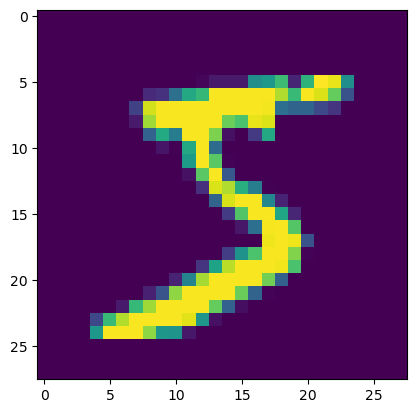

In [3]:
# Let us visualize the first training sample using the Gnuplot library
from matplotlib import pyplot as plt
imageIndex = 0
print("Label for " + str(imageIndex) + "-th train image is: " + str(train_labels[0]))
plt.imshow(train_images[0])

In [4]:
# Do you remember about one-hot encoding ?
#from keras.utils.np_utils import to_categorical
import copy

ori_test_labels=copy.deepcopy(test_labels)

from tensorflow.keras.utils import to_categorical
imageIndex = 0
print("This is the native " + str(imageIndex) + "-th train label: " + str(train_labels[0]))
train_labels = to_categorical(train_labels)
print("This is the one-hot encoding of the " + str(imageIndex) + "-th train label: " + str(train_labels[0]))
test_labels = to_categorical(test_labels)

This is the native 0-th train label: 5
This is the one-hot encoding of the 0-th train label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols,1 )
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')


# Normalize the images so that have zero mean and unitary deviation wrt the train set
train_mean = train_images.mean()
train_std = train_images.std()

train_images = (train_images - train_mean)/train_std
test_images = (test_images - train_mean)/train_std

# Alternatively, we could normalize the image in the [0-1] range instead
#train_images = ((train_images / 255) * 2) -1
#test_images = ((test_images / 255) * 2) -1

#from tensorflow import convert_to_tensor
#train_images=convert_to_tensor(train_images, dtype=tf.int64)
#train_labels=convert_to_tensor(train_labels, dtype=tf.int64)



train_images shape: (60000, 28, 28, 1)
test_images shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


# Defining the neural network architecture (i.e., the network model)
Create a LeNet5-like convolutional neural network taking in input the images as matrices of pixels and suitable to classify each image across 10 different classes.

In [6]:
# The Sequential module is sort of a container for more complex NN elements and
# defines a loop-less NN architecture
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Flatten
#from keras.layers import Convolution2D, MaxPooling2D
#from tensorflow.keras import layers


from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import MaxPooling2D, Conv2D


input_shape = (img_rows, img_cols, 1)

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

model = Sequential()

# First convolutional layer
#model.add(Convolution2D(num_kernel_first_conv_layer, (kernel_size[0], kernel_size[1]), input_shape=input_shape, padding='same'))
model.add(Conv2D(num_kernel_first_conv_layer, (kernel_size[0], kernel_size[1]), input_shape=input_shape, padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=pool_size))

# Second convolutional layer
#model.add(Convolution2D(num_kernel_second_conv_layer, (kernel_size[0], kernel_size[1]), padding='same'))
model.add(Conv2D(num_kernel_second_conv_layer, (kernel_size[0], kernel_size[1]), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=pool_size))

# Turns the sequence of featuremaps into a linear array of features
model.add(Flatten())

# Simplified LeNet5 configuration
model.add(Dense(100))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

2024-08-27 08:17:10.743093: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-27 08:17:10.743373: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 08:17:10.745058: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Instantiate a SGD optimizer with a tentative LR of 10^-2 and using the appropriate loss function and compile the model.

In [7]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
#from keras import optimizers
from tensorflow.keras import optimizers

# Defining our optimizer
optimizer=tf.optimizers.SGD(learning_rate=1e-2)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Let us have a look at the model topology
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

# Training the network

In [8]:
#Doing data augmentation with ImagDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir os parâmetros
BATCH_SIZE = 64
EPOCHS = 20

augmenter = ImageDataGenerator(
    rotation_range=10, # Rotating randomly the images up to 25°
    width_shift_range=0.05, # Moving the images from left to right
    height_shift_range=0.05, # Then from top to bottom
    shear_range=0.10,
    zoom_range=0.05, # Zooming randomly up to 20%
    zca_whitening=False,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode = 'nearest')


print(len(train_images)//BATCH_SIZE)

# Creating a data generator to augment the training images
train_generator = augmenter.flow(train_images, train_labels, batch_size=BATCH_SIZE)

batch_history =model.fit(train_generator, steps_per_epoch=(len(train_images)//BATCH_SIZE),
                         validation_data=(test_images, test_labels),epochs=EPOCHS)

result = model.evaluate(test_images, test_labels)

937


2024-08-27 08:17:11.167546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-08-27 08:17:11.167895: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/20
937/937 [==============================] - 336s 357ms/step - loss: 2.3116 - accuracy: 0.1071 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 2/20
937/937 [==============================] - 320s 342ms/step - loss: 2.2989 - accuracy: 0.1178 - val_loss: 2.2967 - val_accuracy: 0.1108
Epoch 3/20
937/937 [==============================] - 376s 401ms/step - loss: 2.2924 - accuracy: 0.1292 - val_loss: 2.2895 - val_accuracy: 0.1466
Epoch 4/20
937/937 [==============================] - 324s 346ms/step - loss: 2.2732 - accuracy: 0.1849 - val_loss: 2.2619 - val_accuracy: 0.2067
Epoch 5/20
937/937 [==============================] - 281s 299ms/step - loss: 2.1955 - accuracy: 0.3946 - val_loss: 2.1139 - val_accuracy: 0.3187
Epoch 6/20
937/937 [==============================] - 304s 325ms/step - loss: 1.8801 - accuracy: 0.5487 - val_loss: 1.9016 - val_accuracy: 0.3867
Epoch 7/20
937/937 [==============================] - 290s 310ms/step - loss: 1.3841 - accuracy: 0.6551 - val_loss: 1.7699 -

Test accuracy: 0.5249000191688538


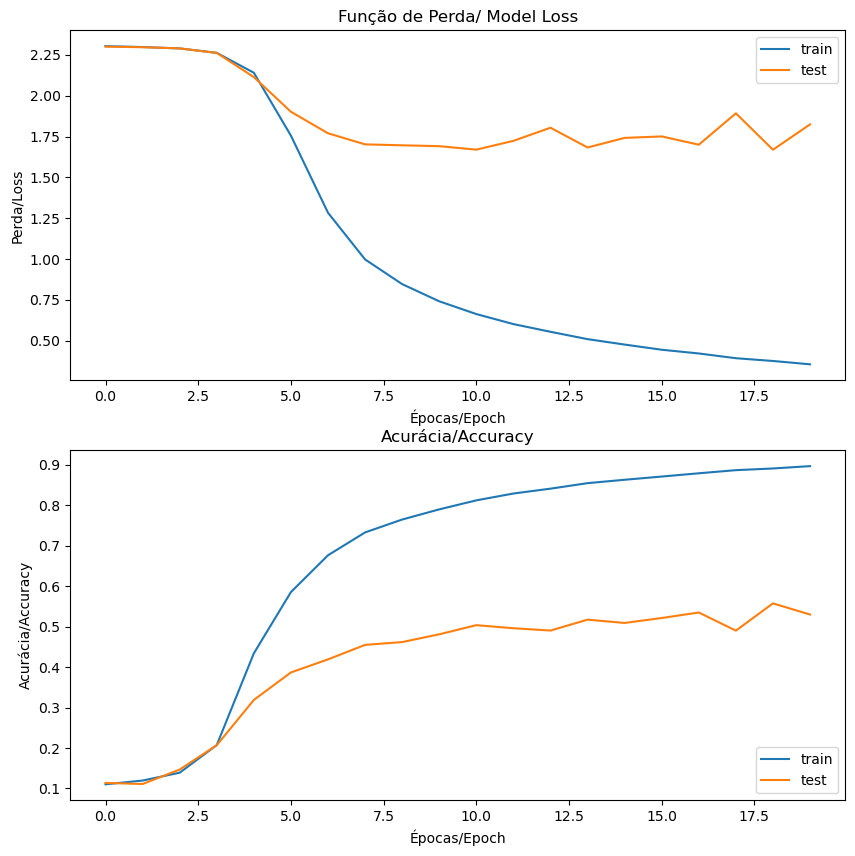

In [9]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

print(f'Test accuracy: {result[1]}')


# Plot the loss function and accuracy
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Loss
axs[0].plot(batch_history.history['loss'], label='Perda de Treinamento')
axs[0].plot(batch_history.history['val_loss'], label='Perda de Validação')
axs[0].set_title('Função de Perda/ Model Loss')
axs[0].set_xlabel('Épocas/Epoch')
axs[0].set_ylabel('Perda/Loss')
axs[0].legend(['train', 'test'], loc='upper right')

# Accuracy
axs[1].plot(batch_history.history['accuracy'], label='Acurácia de Treinamento')
axs[1].plot(batch_history.history['val_accuracy'], label='Acurácia de Validação')
axs[1].set_title('Acurácia/Accuracy')
axs[1].set_xlabel('Épocas/Epoch')
axs[1].set_ylabel('Acurácia/Accuracy')
axs[1].legend(['train', 'test'], loc='lower right')

plt.show()

# Visualizing the network performance

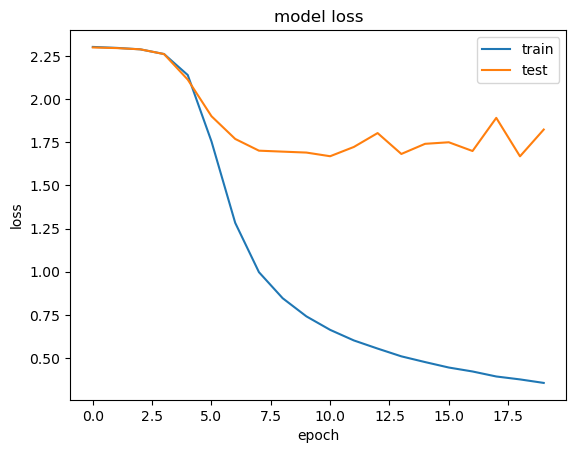

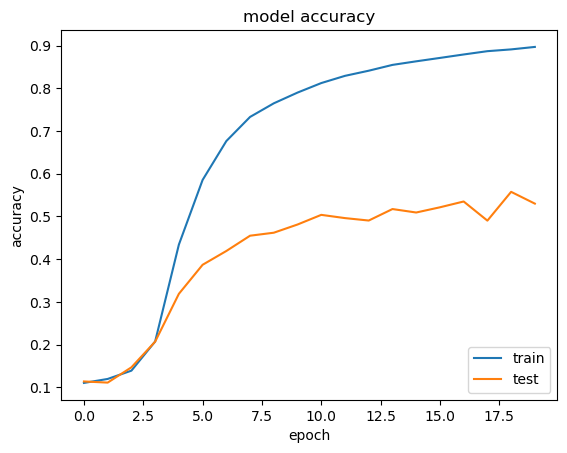

In [10]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
plt.plot(batch_history.history['loss'])
plt.plot(batch_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(batch_history.history['accuracy'])
plt.plot(batch_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference. Then, experiment as follow and compare performance with the reference scenario.

*   **Filter size**: experiment with square filters of different size and compare performance with reference scenario.
*   **Number of filters**: experiment increasing the number of filters in the first and second layer and find the maximum number of filters the network can tolerate before overfitting to the training samples.
* **Padding**: experiment withnarrow and wide convolutions: what changes in terms of featuremap size ?
*  **Pooling layers**: expeirment with different pooling layers (maxpooling and avgpooling): which one yield the best performance ?
What happens if the pooling layers are removed altogether in terms of comlexity-performance tradeoff ?
* **Pooling-less architectures**: Modify the network architecture to obtain a twofold reduction of each featuremap without resorting to pooling layers (hint: take insipiration from the ResNet architecture).
* **Confusion analysis**: Using the proper metric  from sklearn, check which character is most frequently confused with which: can you explain why ?





In [11]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_images)
# Mind that confusion_matrix requires
matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print (matrix)

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

#Saving the training results

Save the best trained model (topology, parameters), and all the related side information required to deploy the trained model later on.


In [ ]:
# Create a directory for saving both the trained model and side information
import os
save_dir = os.path.join(os.getcwd(), 'trained_lenet5_mnist')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

# Save model and weights

model_name = 'model.keras'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Saving mean and standard deviation information as a CSV file
import csv
model_name = 'std_dev.csv'
model_path = os.path.join(save_dir, model_name)
w = csv.writer(open(model_path, "w"))
dict={}
dict['mean'] = train_mean
dict['std'] = train_std
for key, val in dict.items():
    w.writerow([key, val])
print('Saved side information at %s ' % model_path)

In [ ]:
# Figure size
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,5))

datas = pd.DataFrame(ori_test_labels,columns=['label'])

print(datas)
print(ori_test_labels)

# Countplot
sns.countplot(x='label', data=datas)
plt.title('Distribution of labels in training set')